Cette formation a pour but de donner une introduction aux librairies jugées fondamentales pour le data scientist en Python. Elle vient à la suite d'une formation sur les bases du langage même.

Les trois packages que l'on va couvrir sont les acteurs historiques majeurs, et sont souvent incontournables :
1. **Pandas** est une librairie de manipulation de données (*équivalent le plus proche en R : dplyr*)
1. **Matplotlib** permet de réaliser des graphiques (*équivalents en R : ggplot2, lattice, base*)
1. **Scikit-learning** regroupe de nombreux algorithmes et modèles pour le machine learning (*équivalents en R : caret, mlr*)

# Pandas

## Introduction

Lors de la formation sur les bases de Python, on a appris à manipuler les types de bases de Python ; listes, dictionnaires, ...
On a vu que Python était un langage généraliste, qui n'est pas spécialisé dans le traitement de données. Les types de base se prêtent donc mal aux calculs mathématiques.

Ainsi, la notion d'addition de listes n'est pas l'addition mathématique terme à terme, mais plutôt la concaténation.

In [ ]:
[1, 2, 3] + [4, 5, 6]

Et l'addition d'un scalaire à une liste n'est pas possible.

In [ ]:
try:
    [1, 2, 3] + 4
except:
    print("Erreur : Python ne sait pas faire ça !")

Mais ces limitations initiales peuvent être comblées facilement par ce qui fait la force de Python : l'utilisation de packages spécialisés.

Par exemple, Numpy apporte le calcul matriciel. Par habitude et flemme, on l'importe toujours sous le nom **np**.

In [ ]:
import numpy as np

np.array([1,2,3]) + 4

Mais la puissance de Numpy pour le calcul matriciel et scientifique n'est pas forcément suffisante pour faire du traitement de données. On souhaiterait avoir des objets et des opérations de plus haut niveau. Par exemple les data frames, objets centraux en R, permettent de manipuler plusieurs listes en gardant une cohérence. Et on souhaiterait pouvoir manipuler une ou plusieurs colonnes pour réaliser des opérations complexes (group by, ...).

C'est ce pour quoi Pandas a été développé !

## L'objet de base de Pandas : Series

### Création

Pandas s'importe usuellement sous le nom **pd**

In [ ]:
import pandas as pd

L'objet le plus fondamental dans Pandas est la série (**Series**). Il permet de représenter une série de données, c'ets-à-dire une liste unidimensionnelle d'objets de tout type. Chaque donnée dispose d'un label. Ces labels forment ce qu'on appelle l'**index** de la série. On peut construire une série à partir par exemple de listes ou de tableaux NumPy :

In [ ]:
pd.Series([1, 'toto', None], index=['a', 'b', 'c'])

Si on ne précise pas d'index, Pandas utilise par défaut les numéros de lignes (en commençant à 0).

In [ ]:
pd.Series([1, 'toto', None])

### Manipulation

#### Addition d'un scalaire

In [ ]:
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s

Que donne $s+1$ ?

In [ ]:
s + 1

#### Addition de deux séries

In [ ]:
s2 = pd.Series([1, 2, 3], index=['c', 'b', 'd'])
s2

Que donne $s + s2$ ?

In [ ]:
s + s2

On voit déjà une différence notable avec Numpy. L'addition de deux séries alignent les index, pour additionner les lignes correspondantes. L'**index** a un rôle crucial en Pandas.

### Indexation

L'index permet d'extraire un élément de la série directement par son label

In [ ]:
s['b']

On peut aussi sélectionner par numéro de ligne, avec la même syntaxe. Pandas se débrouille pour savoir si on parle d'un index ou d'un numéro de ligne.

In [ ]:
s[1]

Comme sur les listes, on peut prendre des tranches (slicing)

In [ ]:
s[1:]

In [ ]:
s[-1]

On peut aussi faire de l'indexation booléenne 

In [ ]:
s[[True, False, True]]

Cela permet de filtrer une série suivant une condition avec une syntaxe simple.

In [ ]:
s[s>1]

On peut modifier ou ajouter des éléments

In [ ]:
s['d'] = 4

s

In [ ]:
s[3] = 0

s

### Loc et iloc

On a vu que s[x] peut signifier soit l'élément ayant le label x, soit le x-ème élément si c'est un nombre. Pandas sait choisir la bonne signification... quand il n'y a pas d'ambiguïté. Mais il est facile d'imaginer des cas problématiques.

In [ ]:
s = pd.Series(['a', 'b', 'c'], index=[2, 3, 4])
s

In [ ]:
s[2]

Pour prendre l'élement n°2, il faut être plus explicite dans notre façon d'indexer. Pandas met à disposition deux indexeurs :

- **.loc** permet d'accéder par label

- **.iloc** permet d'accéder par numéro

In [ ]:
s.loc[2]

In [ ]:
s.iloc[2]

## L'objet le plus utilie : le DataFrame

### Création

Un DataFrame est une structure bidimensionnel. Il s'agit d'un ensemble de Series. Une Series est une colonne de DataFrame. On peut le construire par exemple à partir d'un dict dont les valeurs sont des Series.

In [ ]:
s1 = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
s2 = pd.Series([4, 5, 6], index = ['c', 'b', 'd'])

df = pd.DataFrame({'toto': s1, 'titi': s2})

df

Il existe de nombreuses autres façons de construire un DataFrame. Par exemple à partir d'un dict de lists :

In [ ]:
d = {'toto': [1, 2, 3, np.nan], 'titi': [np.nan, 5, 4, 6]}

pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

Ou encore une liste de listes. On peut alors préciser l'index et le nom des colonnes (sinon Pandas utilise des numéros).

In [ ]:
pd.DataFrame([[1, np.nan], [2, 5], [3, 4], [np.nan, 6]], index=['a', 'b', 'c', 'd'], columns=['toto', 'titi'])

### Manipulation

#### Indexation

Les crochets permettent d'extraire une colonne.

In [ ]:
df['toto']

Il s'agit alors d'une Series

In [ ]:
type(df['toto'])

On peut aussi utiliser :

In [ ]:
df.toto

Pour extraire une ligne, on peut utiliser **loc** ou **iloc**.

In [ ]:
df.loc['a']

In [ ]:
type(df.loc['a'])

In [ ]:
df.loc[['a', 'c']]

In [ ]:
type(df.loc[['a', 'c']])

In [ ]:
df.iloc[-2:]

Pour extraire plusieurs lignes, on peut aussi utiliser des crochets

In [ ]:
df[0:2]

Par contre, pour une seule ligne cela ne marche pas. Il faut utiliser iloc.

In [ ]:
try:
    df[0]
except:
    print("Il n'y a pas de colonne nommée '0'")

On peut aussi faire de l'indexation booléenne, pour sélectionner des lignes suivant une condition

In [ ]:
df[df['toto'] > 1]

Pour extraire un élément, on peut sélectionner la série puis l'élément

In [ ]:
df['toto']['b']

Plus directement, on peut passer la ligne et la colonne à loc et iloc

In [ ]:
df.loc['b', 'toto']

In [ ]:
df.iloc[1, 0]

Pour toutes ces fonctions, on peut faire du slicing, ou passer des listes, pour extraire plusieurs éléments

#### Manipulations globales

On a vu comment extraire des lignes ou des colonnes, mais il existe aussi de nombreuses fonctions s'appliquant à l'ensemble du data frame. Ces fonctions sont disponibles sous la forme *objet.fonction* (en termes de programmation orientée objet, ce sont des méthodes de l'objet).

##### Voir les premières lignes

In [ ]:
df.head(2)

##### Trier

Suivant l'index

In [ ]:
df.sort_index(ascending=False)

Suivant une colonne

In [ ]:
df.sort_values('titi')

Ces fonctions retournent un nouveau DataFrame et ne modifient pas l'objet d'origine. Il faut les assigner à un nouvel objet (avec le même nom ou pas), ou utiliser l'argument *inplace=True*.

Cela permet aussi d'enchaîner les fonctions.

In [ ]:
df.sort_values('titi').head(2)

##### Compter les occurrences des valeurs

In [ ]:
df['toto'].value_counts()

##### Gestion des valeurs manquantes

In [ ]:
df.dropna()

In [ ]:
df.fillna(0)

##### Opérations mathématiques

In [ ]:
df.sum()

In [ ]:
df.mean()

Ces fonctions ignorent les valeurs manquantes par défaut (argument *skipna*)

Pour calculer la moyenne des lignes plutôt que des colonnes.

In [ ]:
df.mean(axis=1)

##### Group by

In [ ]:
df['is_na'] = df['titi'].isnull()

df.groupby('is_na').mean()

### Import et export

Il est possible d'importer et d'exporter vers de nombreux formats de fichiers.

Pour l'export, on utilise les méthodes du data frame nommées *to_** (to_csv, to_excel, ...)

In [ ]:
df.to_csv('df.csv')

Pour l'import, l'objet n'existe pas encore, on utilise donc les fonctions de Pandas nommées *read_** qui retournent un data frame.

In [ ]:
pd.read_csv('df.csv')

On voit que par défaut l'export écrit l'index comme une colonne normale. Mais l'import ne le charge pas comme index par défaut. On peut préciser l'argument *index_col* pour indiquer le numéro de la colonne qui doit servir d'index.

In [ ]:
pd.read_csv('df.csv', index_col=0)

# Graphiques

Pour réaliser des graphiques, il existe de nombreux packages. Les plus courants sont les suivants :

1. **Matplotlib** : le package le plus ancien, que l'on va voir dans la suite

1. **Seaborn** : une surcouche à Matplotlib qui permet de tracer des graphiques statistiques poussés et améliore l'esthétique

1. **Plotly** : aussi disponible en R, il permet de faire des graphiques interactifs. Il fournit aussi **Plotly express** pour faire rapidement des graphiques avec une approche "grammaire de graphiques"

1. **Bokeh** : pour faire des graphiques interactifs complexes

1. **Altair** : qui combine "grammaire de graphiques" et interactivité et reposant sur un langage de spécification de visualisations (Vega)

Pour avoir une vision plus détaillée de cet écosystème riche, on peut par exemple voir cette présentation du créateur d'Altair : https://www.youtube.com/watch?v=FytuB8nFHPQ (slides : https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017 )

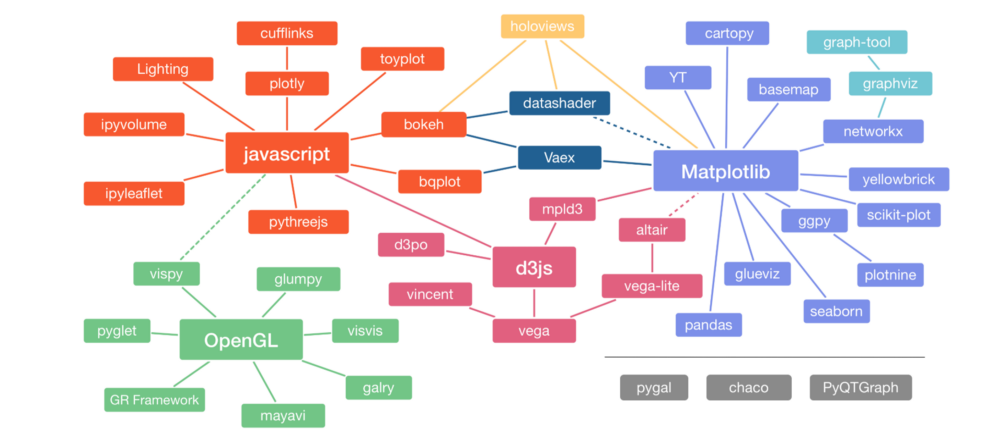

## Matplotlib

### Principe

Matplotlib remonte à l'époque où l'outil de référence pour faire de la manipulation et de la visualisation de données est Matlab ! Numpy a apporté le calcul matriciel mais il manque des outils graphiques. Matplotlib cherche donc initialement à copier ce qui se fait en Matlab. L'objectif est de concevoir un équivalent gratuit et open source à Matlab, pour venir le concurrencer.

Matplotlib reprend différents concepts de Matlab :

1. Une **Figure** comprend un ou plusieurs graphiques. On peut avoir plusieurs figure.

1. Un **Axes** est un ensemble d'axes, c'est-à-dire un graphique sur lequel on peut tracer des données.

1. Un **Axis** est un axe du graphique (abscisses, ordonnées, ...)

Il existe deux façons de faire un graphique :

1. On peut manipuler ces objets (figure, axes, ...) avec une approche programmation orientée objet
1. On peut utiliser Pyplot, un module de Matplotlib, qui se veut plus facile à utiliser en gérant les aspects techniques à notre place et en gérant l'état du graphique (axes courant, ...)

Pour les données à tracer, Matplotlib utilise des tableaux Numpy. Néanmoins tout objet qui peut être converti directement peut être utilisé (listes, séries Pandas, ...)

### Faire un graphique simple

Pour commencer, on importe Pyplot sous son alias usuel.

In [ ]:
import matplotlib.pyplot as plt

Dans un notebook Jupyter, une petite manipulation est nécessaire pour afficher directement les graphiques.

In [ ]:
%matplotlib inline

Le graphique le plus simple se fait avec la fonction *plot* de Pyplot, en lui fournissant la liste des abscisses en premier argument et la liste des ordonnées en deuxième argument.

In [ ]:
plt.plot([1, 2, 3], [1, 4, 9])

D'autres fonctions sont disponibles pour les autres types de graphiques.

In [ ]:
plt.scatter([1, 2, 3], [1, 4, 9])

Dans l'approche orientée objet, on crée d'abord la figure et les axes et on utilise les méthodes de ces objets. Cela peut s'avérer plus simple si on réalise plusieurs graphiques à la fois.

In [ ]:
fig, ax = plt.subplots()

ax.scatter([1, 2, 3], [1, 4, 9])

### Personnalisation

Tous les éléments du graphique sont personnalisables.

In [ ]:
plt.bar([1, 2, 3], [1, 4, 9], color='red')
plt.plot([1, 2, 3], [1, 4, 9], linewidth=10)
plt.title('Graphique')

plt.xlabel('Abscisses')
plt.ylabel('Ordonnées')

On peut s'inspirer de la galerie d'exemples disponible sur le site de Matplotlib : https://matplotlib.org/gallery/index.html

### Utiliser des data frames Pandas 

Pour illustrer l'utilisation de Matplotlib à partir de data frames Pandas, chargeons le jeu de données classique Iris.

In [ ]:
iris = pd.read_csv('iris.csv')

iris.head(5)

On peut utiliser Matplotlib directement en lui donnant des Series, qui peuvent être converties directement en tableaux Numpy.

In [ ]:
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=iris['petal_length'])

Matplotlib fournit aussi l'argument *data* qui permet de donner le data frame et de ne faire référence qu'aux noms des colonnes.

In [ ]:
plt.scatter('sepal_length', 'sepal_width', c='petal_length', data=iris)

Pandas fournit aussi une interface s'appuyrant sur Matplotlib. Il faut pour cela utiliser la méthode *plot* du data frame (pour des lignes) ou les méthodes plot.scatter (pour des nuages de points), plot.bar (pour des histogrammes) , ...

In [ ]:
iris.plot.scatter('sepal_length', 'sepal_width', c='petal_length')

On peut donc utiliser toute la puissance de Matplotlib pour customiser le graphique.

In [ ]:
iris['species'].value_counts().plot.bar(color='cyan')

plt.xticks(rotation=45)
plt.xlabel('Espèce')
plt.ylabel('Nombre')
plt.title('Répartition des espèces')

### Limitations

Matplotlib a une approche bas niveau : on définit ce qu'on trace élément par élément. Cela permet d'avoir quelque chose de très polyvalent mais peut s'avérer laborieux pour certains graphiques.

Les packages plus récents ont une approche plutôt "grammar of graphics". Dans cette approche, introduite en 1999 par Leland Wilkinson et notamment implémentée par Hadley Wickham dans ggplot2, on décrit les différents composants syntaxiques du graphique (données, conversions esthétiques, géométries, échelles, ...).

Pour illustrer cela, essayons de tracer le graphique précédent mais en utilisant l'espèce pour colorer les points.

In [ ]:
try:
    plt.scatter('sepal_length', 'sepal_width', c='species', data=iris)
except:
    print("Erreur : setosa n'est pas une couleur !")

Matplotlib demande de spécifier exactement la couleur, et ne sait pas encoder des variables catégorielles. Il faut donc le faire manuellement.

On peut par exemple pré-calculer la couleur.

In [ ]:
palette = {'setosa': 'red',
          'versicolor': 'blue',
           'virginica': 'green'}

iris['couleur'] = iris['species'].map(palette)

plt.scatter('sepal_length', 'sepal_width', c='couleur', data=iris)

Ou bien on peut boucler sur les différentes espèces pour superposer trois nuages de points.

In [ ]:
for espece in iris['species'].unique():
    plt.scatter('sepal_length', 'sepal_width', data=iris[iris['species']==espece], label=espece)
    
plt.legend()

D'autres packages basés sur la grammaire des graphiques peuvent le faire directement (Altair, Plotly Express, ...)

In [ ]:
import altair as alt
alt.Chart(iris).mark_point().encode(x='sepal_length', y='sepal_width', color='species').interactive()

In [ ]:
import plotly.express as px

px.scatter(iris, x='sepal_length', y='sepal_width', color='species')

# Scikit Learn

**Scikit Learn** est la librairie de référence pour le machine learning en Python. Elle regroupe de nombreux algorithmes d'apprentissage, mais aussi des fonctions de prétraitement des données, de sélection des modèles, etc. Cela permet de couvrir tout le processus de modélisation avec une librairie bien organisée et cohérente. Elle est donc une raison importante qui a permis à Python de devenir le langage de premier plan pour le machine learning.

Même si son nom complet est Scikit Learn, la librairie s'appelle par le diminutif **sklearn**. Il est toutefois peu courant de l'importer directement car les différentes fonctions sont réparties en différents modules, desquels on importe les fonctions souhaitées. Parmi ces modules, on peut citer :
- **cluster** pour tout ce qui concerne le clustering
- **datasets** pour des exemples de jeux de données
- **ensemble** pour les méthodes ensemblistes (combinaisons de modèles, random forest, gradient boosting, ...)
- **linear_model** pour les modèles linéaires (régression linéaire (classique ou régularisée), régression logistique, ...)
- **metrics** pour le calcul de scores
- **model_selection** pour tout ce qui concerne la cross validation, l'optimisation d'hyperparamètres, ...
- **neighbors** pour les méthodes basées sur les voisins (KNN)
- **pipeline** pour enchaîner les modèles
- **preprocessing** pour le prétraitement des données (standardisation, ...)
- **svm** pour les Support Vector Machines
- **tree** pour les arbres de décision

Pour une liste plus complète et plus détaillée, on peut se référer à la documentation officielle : https://scikit-learn.org/stable/modules/classes.html

## Un premier modèle

Pour illustrer les possibilités de Scikit learn, prenons un des jeux de données disponibles au sein de la librairie. Il s'agit d'un jeu de données décrivant le prix de l'immobilier à Boston, en fonction de diférentes variables.

Au sein du module **datasets**, on peut trouver une fonction **load_boston** qui permet de charger les données et retourne un dictionnaire avec différents champs.

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

boston.keys()

- **data** contient les observations sous forme matricielle
- **target** contient la variable cible (prix) 
- **feature_names** donne le nom des colonnes de *data*
- **DESCR** est une documentation du jeu de données
- **filename** est le nom du fichier dans lequel le jeu de données est stocké

In [ ]:
print(boston['DESCR'])

Pour pouvoir mieux le manipuler, mettons **data** sous la forme d'un DataFrame

In [ ]:
df_boston = pd.DataFrame(boston['data'], columns=boston['feature_names'])

df_boston

**target** est un array numpy.

In [ ]:
target = load_boston()['target']

target

Une des deux premières choses à faire est de séparer les données en jeux d'entraînement et de test, pour éviter le surapprentissage. Le module **model_selection** propore la fonction **train_test_split** pour cela. Elle prend les features, la cible et le taux de répartition. Pour garder une répétabilité, on peut aussi lui spécifier une graîne pour le générateur de nombres aléatoires.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_boston, target, test_size=0.2, random_state=42)

Pour un premier essai de modèle, commençons simple : une régression linéaire. Elle est disponible dans le module **linear_model**.

In [ ]:
from sklearn.linear_model import LinearRegression

Appeler la fonction **LinearRegression** crée un objet que l'on va manipuler pour faire l'apprentissage et les prédictions.

In [ ]:
lr = LinearRegression()

Pour l'entraînement, on utilise la méthode **fit** du modèle.

In [ ]:
lr.fit(X_train, y_train)

L'entraînement modifie le contenu de l'objet. Il contient maintient tous les paramètres nécessaires, que l'on peut regarder si on est curieux.

In [ ]:
lr.coef_

Pour la prédiction, on utilise la méthode **predict**.

In [ ]:
y_pred = lr.predict(X_test)

On peut comparer graphiquement les prédictions aux valeurs réelles, pour vérifier qu'elles sont raisonnables.

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([0,50], [0,50], color='black', linestyle='dashed')

plt.xlabel('Réel')
plt.ylabel('Prédiction')

Pour avoir une vision plus précise, on peut utiliser des métriques (disponibles dans le module **metrics**), comme par exemple le MSE.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_pred, y_test)

## Changer de modèle

Tout l'intérêt de Scikit learn est que les modèles suivent tous la même interface : une méthode **fit** pour l'apprentissage et une méthode **predict** pour l'inférence. Il est donc très facile de changer de modèle.

Par exemple, pour faire une random forest, il suffit d'aller chercher la fonction **RandomForestRegressor** (il existe aussi RandomForestClassifier pour la classification) dans le module **ensemble**. On l'appelle ensuite pour créer notre modèle. On pourrait lui spécifier des arguments (hyperparamètres, ...), mais dans un premier temps gardons les valeurs par défaut.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

mean_squared_error(y_pred, y_test)

On voit tout de suite le gain apporté par ce modèle non-linéaire. Mais on peut facilement contnuer notre exploration de différents modèles.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

dict_modeles = {'Régression linéaire': LinearRegression(),
               'Random forest': RandomForestRegressor(),
               'Gradient boosting': GradientBoostingRegressor()}

df_resultats = pd.DataFrame([], columns=['MSE']) # data frame pour stocker les résultats

for nom_modele, modele in dict_modeles.items():
    modele.fit(X_train, y_train)
    y_pred = modele.predict(X_test)
    
    df_resultats.loc[nom_modele, 'MSE'] = mean_squared_error(y_pred, y_test)

df_resultats

In [ ]:
df_resultats.plot.barh()

## Prétraitement

Outre le choix et l'optimisation du modèle, un levier important d'amélioration dans le machine learning est le prétraitement des données. Certains modèles peuvent par exemple nécessiter des variables normalisées. Le module **preprocessing** contient différentes fonctions utiles.

Les modèles qu'on a essayés sont linéaires ou basés sur des arbres, donc insensibles à la normalisation. Mais on peut essayer des transformations non-linéaires. Essayons par exemple de voir si la régression linéaire serait plus performante si on applique une loi de puissance sur les features pour les rendre plus gaussiennes. L'utilisation des transformations est très similaire à celle des modèles :
- une méthode **fit** permet de déterminer les paramètres de la transformation
- une méthode **transform** permet d'appliquer la transformation aux données (si on transforme la variable cible, il existe la méthode **inverse_transform** pour obtenir les prédictions dans l'échelle d'origine)


In [ ]:
from sklearn.preprocessing import PowerTransformer

prepro = PowerTransformer()

prepro.fit(X_train)

X_train_prepro = prepro.transform(X_train)

On peut ensuite entraîner un modèle sur ces données transformées :  il faut simplement bien veiller à appliquer la même transformation sur les données de test.

In [ ]:
lr = LinearRegression()
lr.fit(X_train_prepro, y_train)

X_test_prepro = prepro.transform(X_test)
y_pred = lr.predict(X_test_prepro)

mean_squared_error(y_pred, y_test)

## Pipelines

Lorsqu'on enchaîne ainsi différentes étapes, il devient facile de se tromper : oubli d'une transformation sur les données de test, mélange des données de test et d'entraînement, fit sur les données de test, ...

Pour cela, Scikit learn propose la notion de **Pipeline**. Il s'agit d'un enchaînement de transformations et de modèles, qui pourra être utilisé en bloc. Ainsi la fonciton **fit** entraînera toutes les étapes du traitement, et la fonction **predict** appliquera toutes les transformations et prédictions nécessaires pour arriver au résultat final.

Pour construire un pipeline, on fournit une liste de tuples de la forme $(nom, objet)$.

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', PowerTransformer()), ('modèle', RandomForestRegressor())])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
mean_squared_error(y_pred, y_test)

# Hyperparameter tuning

Pour finir, regardons rapidement un pan important de la modélisation pour lequel Scikit learn apporte des outils puissants : l'optimisation d'hyperparamètres.



Imaginons par exemple que l'on souhaite par exemple trouver les meilleurs hyperparamètres pour un random forest. On peut imaginer le faire manuellement en spécifiant les hyperparamètres lors de la création du modèle.

In [ ]:
rf1 = RandomForestRegressor(n_estimators=50)
rf1.fit(X_train, y_train)
print(mean_squared_error(rf1.predict(X_test), y_test))

rf2 = RandomForestRegressor(n_estimators=200)
rf2.fit(X_train, y_train)
print(mean_squared_error(rf2.predict(X_test), y_test))

Mais on peut aussi faire plus précis, plus puissant, plus rapide de manière plus simple !

La fonction **GridSearchCV** (disponible dans le module **model_selection**) par exemple va permettre de :
1. générer toutes les combinaisons de valeurs d'hyperparamètres que l'on souhaite (*grid search*)
1. pour chaque combinaison, calculer plusieurs fois le modèle sur différents découpages des données (*cross validation*)
1. choisir la meilleure combinaison

Et avec l'argument *n_jobs*, elle le fait en parallèle (la valeur -1 signifie l'utilisation de tous les coeurs) !

In [165]:
from sklearn.model_selection import GridSearchCV

parametres = {'n_estimators': [10, 20, 50, 100, 200], 'max_depth': [2, 3, 4, 5]}

rf = RandomForestRegressor()
grid = GridSearchCV(rf, parametres, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.3s finished


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 50, 100, 200]},
             verbose=2)

Si cela nous intéresse, on peut regarder les valeurs sélectionnées.

In [ ]:
grid.best_params_

Mais cela n'est pas nécessaire : on peut simplement utiliser la méthode **predict** pour faire les prédictions avec le meilleur modèle retenu.

In [ ]:
y_pred = grid.predict(X_test)

mean_squared_error(y_pred, y_test)

Même si on a juste donné un aperçu rapide des possibilités de Scikit learn, il faut bien garder en tête ses forces : permettre de manipuler simplement et de manière cohérente des modèles mais aussi fournir des outils puissants pour simplifier chaque étape du processus de  machine learning.